In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Мы выкачали данные, сделали первичный обзор. Добавили дополнительные признаки связанные с геолокацией. Дальнейшими задачами являются:
    
    1.Дополнительно изучить новые признаки.
    2.Заполнить пропуски.

In [2]:
data = pd.read_csv('../result.csv')

In [3]:
data.shape

(3155, 18)

In [4]:
data.head()

Unnamed: 0   size class                                            address  \
0  1061223879   28.8   NaN   Москва, м. Марксистская, улица Александра Сол...   
1  1335488313  588.2   NaN   Москва, м. Марксистская, улица Александра Сол...   
2  1617672126   45.0   NaN   Москва, м. Шоссе Энтузиастов, Электродный про...   
3  1585544645  100.0   NaN   Москва, м. Бульвар Дмитрия Донского, Старокач...   
4  1567297779  190.0   NaN   Москва, м. Новогиреево, Федеративный проспект...   

   price  pledge                                              descr  \
0   1354   39000  Помещение на 2 этаже административного здания....   
1    850  500000  Блок комнат на 4 этаже административного здани...   
2   1111   50000  Кабинет на 1 этаже административного здания.  ...   
3   1700  170000  Сдаётся офис 100 м2 в элитном ЖК «Синяя Птица»...   
4    789  150000  1 этаж жилого дома. Отдельный вход. 4 кабинета...   

                                              metros  near_metro  \
0    Марксистская (700 м) .  Таганская (800 м) . ...       700.0   
1    Марксистская (700 м) .  Таганская (800 м) . ...       700.0   
2    Шоссе Энтузиастов (200 м) .  Соколиная гора ...       200.0   
3    Бульвар Дмитрия Донского (700 м) .  Улица Ст...       700.0   
4    Новогиреево (1.2 км) .  Перово (1.2 км) .  Ш...      1200.0   

                                                 url  parking  internet  meal  \
0  https://www.avito.ru/moskva/kommercheskaya_ned...        0         0     0   
1  https://www.avito.ru/moskva/kommercheskaya_ned...        1         0     0   
2  https://www.avito.ru/moskva/kommercheskaya_ned...        1         0     0   
3  https://www.avito.ru/moskva/kommercheskaya_ned...        1         0     0   
4  https://www.avito.ru/moskva/kommercheskaya_ned...        0         1     0   

   security  comfort        lat        lon  distance  
0         0        1  55.745093  37.664815   0.09581  
1         0        1  55.745093  37.664815   0.09581  
2         1        0  55.759659  37.752850   0.27184  
3         1        0  55.569026  37.588647   0.19060  
4         0        0  55.757496  37.802086   0.37023

In [5]:
data = data.drop(['Unnamed: 0', 'address', 'descr', 'metros', 'url'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3155 entries, 0 to 3154
Data columns (total 13 columns):
size          3155 non-null float64
class         1954 non-null object
price         3155 non-null int64
pledge        3155 non-null int64
near_metro    2999 non-null float64
parking       3155 non-null int64
internet      3155 non-null int64
meal          3155 non-null int64
security      3155 non-null int64
comfort       3155 non-null int64
lat           3155 non-null float64
lon           3155 non-null float64
distance      3155 non-null float64
dtypes: float64(5), int64(7), object(1)
memory usage: 320.5+ KB


Пропуски в классе и в метро.

In [7]:
data.head()

size class  price  pledge  near_metro  parking  internet  meal  security  \
0   28.8   NaN   1354   39000       700.0        0         0     0         0   
1  588.2   NaN    850  500000       700.0        1         0     0         0   
2   45.0   NaN   1111   50000       200.0        1         0     0         1   
3  100.0   NaN   1700  170000       700.0        1         0     0         1   
4  190.0   NaN    789  150000      1200.0        0         1     0         0   

   comfort        lat        lon  distance  
0        1  55.745093  37.664815   0.09581  
1        1  55.745093  37.664815   0.09581  
2        0  55.759659  37.752850   0.27184  
3        0  55.569026  37.588647   0.19060  
4        0  55.757496  37.802086   0.37023

# Цена

In [8]:
log_price = np.log(data.price)
log_price = pd.DataFrame(log_price)

<Figure size 1080x360 with 0 Axes>

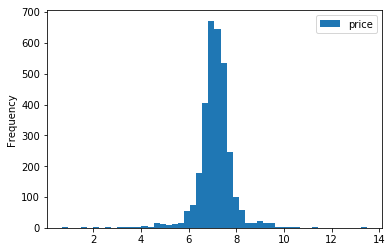

In [9]:
fig = plt.figure(figsize=(15,5))
log_price.plot.hist(bins = 50)

# Площадь

<Figure size 1080x360 with 0 Axes>

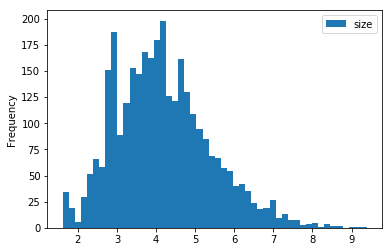

In [10]:
log_size = np.log(data['size'])
log_size = pd.DataFrame(log_size)
fig = plt.figure(figsize=(15,5))
log_size.plot.hist(bins = 50)

# Залог

<Figure size 1080x360 with 0 Axes>

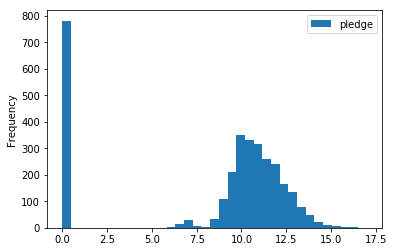

In [11]:
log_pledge = np.log(data.pledge + 1)
#+1 - убирает логарифм от 0
log_pledge = pd.DataFrame(log_pledge)
fig = plt.figure(figsize=(15,5))
log_pledge.plot.hist(bins = 35)

Посмотрим сколько имеют залог и сколько не имеют

In [12]:
pledge_zero = data.pledge[data.pledge == 0]

In [13]:
pledge_zero.shape

(781,)

In [14]:
pledge_non_zero = data.pledge[data.pledge != 0]
pledge_non_zero.shape

(2374,)

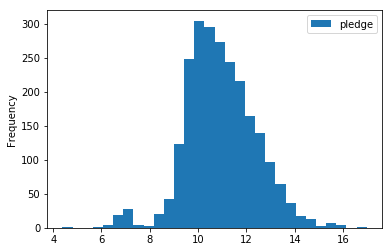

In [15]:
pd.DataFrame(np.log(pledge_non_zero)).plot.hist(bins = 30)

In [16]:
pledge_non_zero.shape

(2374,)

# Расстояние до метро

<Figure size 1080x360 with 0 Axes>

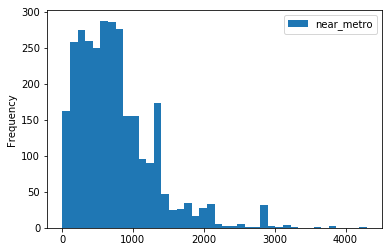

In [17]:
fig = plt.figure(figsize=(15,5))
near_metro = pd.DataFrame(data.near_metro)
near_metro.plot.hist(bins = 40)

# Все вместе

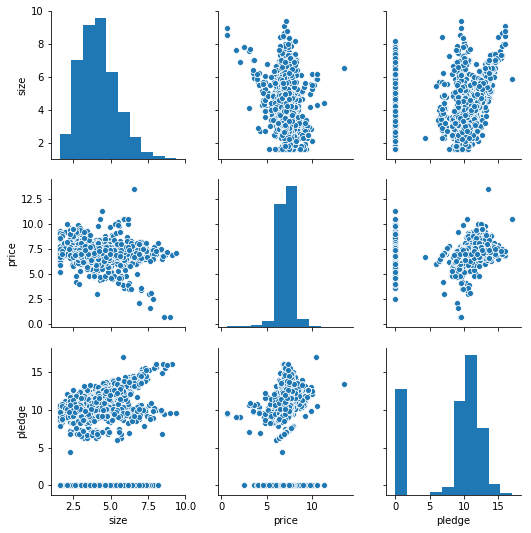

In [18]:
sns.pairplot(pd.concat([log_size, log_price, log_pledge], axis=1))

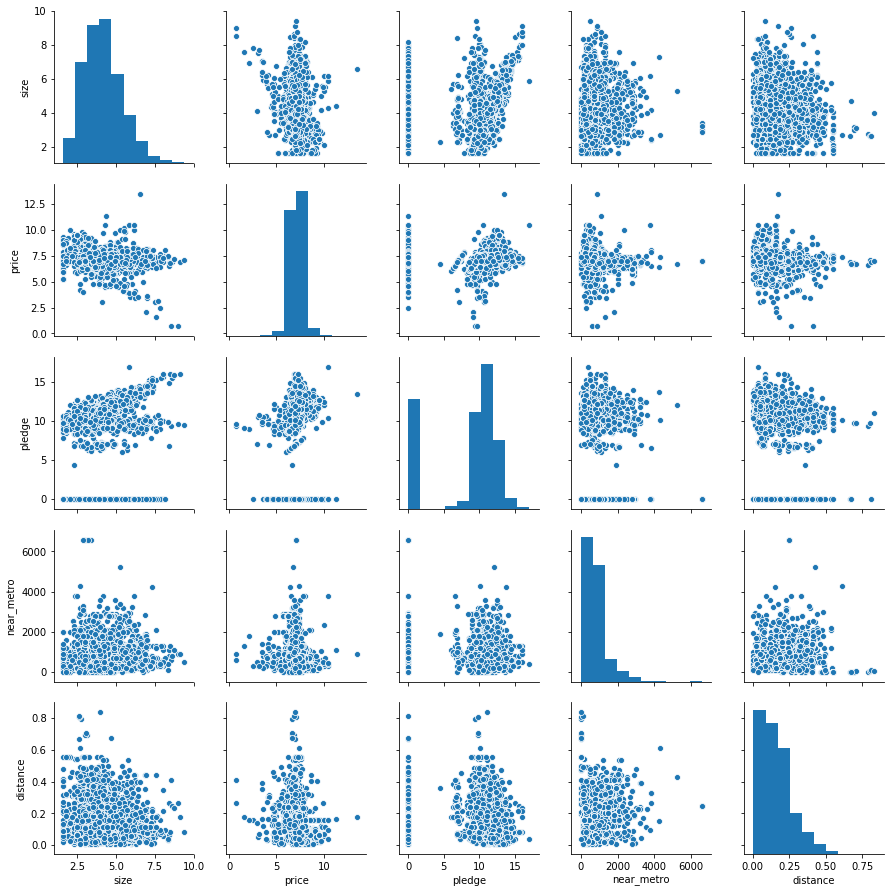

In [19]:
#В FillNan заполнены пропуски
data['near_metro'] = pd.read_csv('got_near_metro.csv')['near_metro']
sns.pairplot(pd.concat([log_size, log_price, log_pledge, pd.DataFrame(data.near_metro), pd.DataFrame(data.distance)], axis=1))

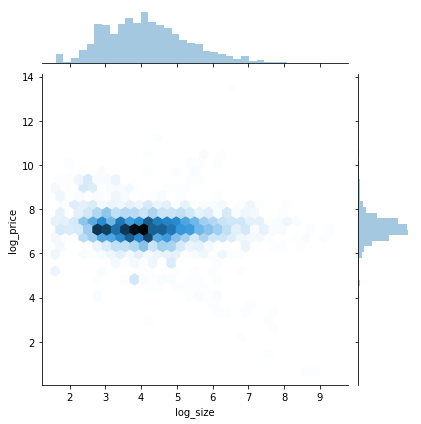

In [20]:
data['log_price'] = np.log(data['price'])
data['log_size'] = np.log(data['size'])
sns.jointplot(x='log_size', y='log_price', data=data,  kind = 'hex',gridsize=30)

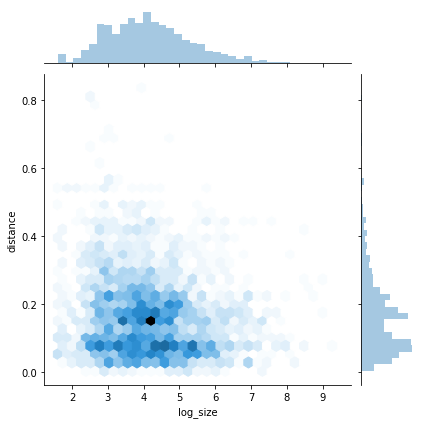

In [21]:
sns.jointplot(x='log_size', y='distance', data=data,  kind = 'hex',gridsize=30)

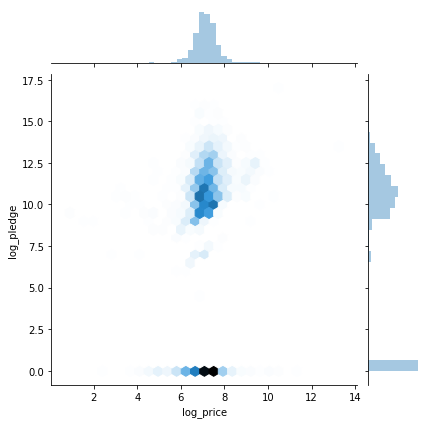

In [22]:
data['log_pledge'] = np.log(data['pledge'] + 1)
sns.jointplot(x='log_price', y='log_pledge', data=data,  kind = 'hex',gridsize=30)

In [23]:
data.describe()

size          price        pledge   near_metro      parking  \
count   3155.000000    3155.000000  3.155000e+03  3155.000000  3155.000000   
mean     167.230491    1869.484311  1.382392e+05   799.018145     0.529319   
std      481.609318   12776.900341  6.290725e+05   625.047388     0.499219   
min        5.000000       2.000000  0.000000e+00     5.000000     0.000000   
25%       27.000000     917.000000  7.000000e+02   400.000000     0.000000   
50%       59.000000    1250.000000  2.850500e+04   700.000000     1.000000   
75%      133.900000    1725.000000  9.800000e+04  1000.000000     1.000000   
max    12000.000000  705100.000000  2.380000e+07  6587.802410     1.000000   

          internet         meal     security      comfort          lat  \
count  3155.000000  3155.000000  3155.000000  3155.000000  3155.000000   
mean      0.341997     0.304279     0.490016     2.739461    55.751188   
std       0.474454     0.460174     0.499980     2.363176     0.067732   
min       0.000000     0.000000     0.000000     0.000000    55.144608   
25%       0.000000     0.000000     0.000000     1.000000    55.711356   
50%       0.000000     0.000000     0.000000     2.000000    55.753828   
75%       1.000000     1.000000     1.000000     4.000000    55.792817   
max       1.000000     1.000000     1.000000    17.000000    56.000965   

               lon     distance    log_price     log_size   log_pledge  
count  3155.000000  3155.000000  3155.000000  3155.000000  3155.000000  
mean     37.612425     0.163031     7.120525     4.175830     8.228262  
std       0.092628     0.111370     0.730661     1.222445     4.884601  
min      37.217238     0.004980     0.693147     1.609438     0.000000  
25%      37.553100     0.077615     6.821107     3.295837     6.552508  
50%      37.617635     0.152340     7.130899     4.077537    10.257870  
75%      37.664815     0.217160     7.452982     4.897093    11.492733  
max      37.920969     0.834780    13.466095     9.392662    16.985196

# Широта и долгота

In [24]:
from folium import plugins
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

In [25]:
#отмечены офисы у которых цена больше 1500.
#чем ярче, тем больше цена * площадь
m = folium.Map(location=[55.764414, 37.647859])
marker_cluster = MarkerCluster().add_to(m)
def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.lat, point.lon], radius=0.1,
                        popup="price = " + str(point.price) + " size = " + str(point.size),
                       ).add_to(marker_cluster)
data.apply(plotDot, axis = 1)

heat_data = [[row['lat'],row['lon'], row['price'] * row['size']] 
             for index, row in data[['lat', 'lon', 'price', 'size']].iterrows() if row['price'] > 1500 ]
HeatMap(heat_data, radius=6).add_to(m)
m

# Категориальные признаки

In [71]:
null_classes = data[data['class'].isnull()]
not_null_classes = data[~data['class'].isnull()]
null_classes.head(5)

size class  price  pledge  near_metro  parking  internet  meal  security  \
0   28.8   NaN   1354   39000       700.0        0         0     0         0   
1  588.2   NaN    850  500000       700.0        1         0     0         0   
2   45.0   NaN   1111   50000       200.0        1         0     0         1   
3  100.0   NaN   1700  170000       700.0        1         0     0         1   
4  190.0   NaN    789  150000      1200.0        0         1     0         0   

   comfort        lat        lon  distance  log_price  log_size  log_pledge  
0        1  55.745093  37.664815   0.09581   7.210818  3.360375   10.571343  
1        1  55.745093  37.664815   0.09581   6.745236  6.377067   13.122365  
2        0  55.759659  37.752850   0.27184   7.013016  3.806662   10.819798  
3        0  55.569026  37.588647   0.19060   7.438384  4.605170   12.043560  
4        0  55.757496  37.802086   0.37023   6.670766  5.247024   11.918397

A - 0, B - 1, C - 2, D - 3

In [72]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# le.fit(not_null_classes['class'])
# not_null_classes['class'] = le.transform(not_null_classes['class'])

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
proc_data = not_null_classes.drop(['log_pledge', 'log_price', 'log_size', 'class'], axis=1)
target_data = not_null_classes['class'].copy()

In [79]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier()
scores = cross_val_score(clf, proc_data, target_data, cv=15)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.66917293  0.77443609  0.73484848  0.66666667  0.67938931  0.64122137
  0.7         0.68992248  0.72868217  0.6744186   0.76744186  0.72868217
  0.69767442  0.72093023  0.82945736]
Accuracy: 0.71 (+/- 0.10)


In [35]:
X_data = null_classes.drop(['log_pledge', 'log_price', 'log_size', 'class'], axis=1)

In [36]:
clf.fit(proc_data, target_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
X_data['class'] = clf.predict(X_data)

In [38]:
proc_data['class'] = target_data

In [39]:
Result = pd.concat([X_data, proc_data])

In [46]:
a = pd.DataFrame(Result['class']).plot

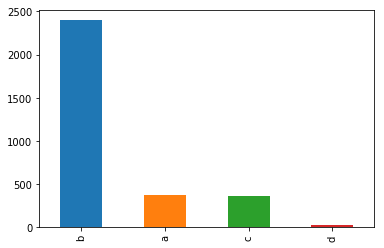

In [57]:
Result['class'].value_counts().plot.bar()